### Algorithm to  Predict the Medical Insurance Costs

In [1]:
## Standard import block
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Loading the data provided 
ins_cost = pd.read_csv('data/insurance_cost.csv')
ins_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Performing the Exploratory Data Analysis - EDA

In [3]:
# Review the summary of the 'Charges'
ins_cost['charges'].describe()


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [4]:
ins_cost.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Lets check the charges for missing or NaN data
ins_cost['charges'].isna().sum()

0

In [6]:
# Lets check Charges for missing values
ins_cost['charges'].isnull().sum()

0

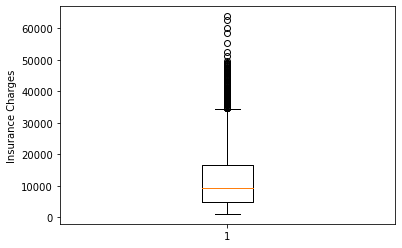

In [7]:
# Lets check the speard of the data

fig,ax = plt.subplots()
ax.boxplot(ins_cost['charges']);
ax.set(ylabel = "Insurance Charges");

In [8]:
# The spread does show that there are outliers - on the higher side above $35,000
# Lets not remove outliers as there are significant number of outliers

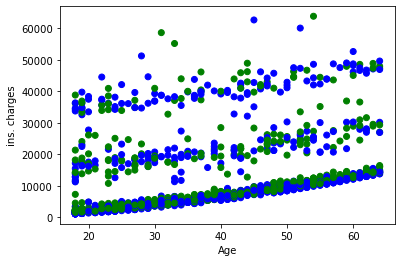

In [9]:
# Lets check how charges are related to age

fig,ax = plt.subplots()
colors = {'female':'green','male':'blue'}
ax.scatter(x = ins_cost['age'],
           y = ins_cost['charges'],
           c = ins_cost['sex'].map(colors));
ax.set(xlabel='Age',ylabel='ins. charges');

In [10]:
# So within band 0-$10,000 - expenses are increasing with age
# Within band 10k to 20k - trend is that expenses increse with age
# Within band 30k and 40k - trend is that expenses increase with age

# Also same is the trend for both sexes - females and males

In [11]:
ins_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


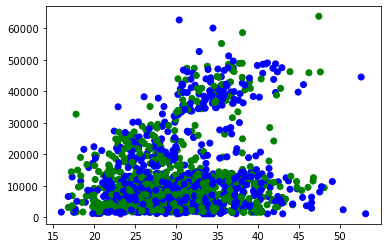

In [12]:
# Lets check how charges are related to BMI

fig,ax = plt.subplots()
colors = {'female':'green','male':'blue'}
ax.scatter(x=ins_cost['bmi'],y=ins_cost['charges'],c=ins_cost['sex'].map(colors));

In [13]:
# For those who spent upto $10,000 increasing BMO does not seem to increase the charges
# But those who are spending above $10,000 there is a increase in charges with increasing BMI

# This is for both males and females

In [14]:
# Lets check how number of children is related to Insurance charges

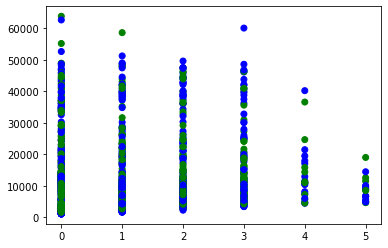

In [15]:
fig,ax = plt.subplots()
colors ={'female':'green','male':'blue'}

ax.scatter(x = ins_cost['children'], y = ins_cost['charges'], c=ins_cost['sex'].map(colors));

In [16]:
# Low Insurance charges for people with 4 and 5 children - may be this implies less disposalbel income for insurance
# also for children 0,1,2,3 - there is a weak trend that with increase in number of children there is a decrease in Insurance charges

# No difference in trends w.r.t sexes



In [17]:
ins_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


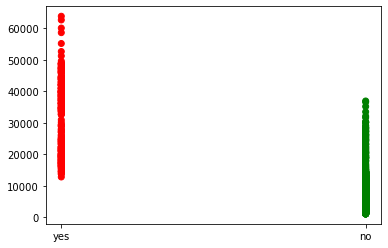

In [18]:
# Lets check how smoking status relates to charges

fig,ax = plt.subplots()
colors = {'yes':'red','no':'green'}
ax.scatter(x=ins_cost['smoker'],y=ins_cost['charges'],c=ins_cost['smoker'].map(colors));

In [19]:
# Clearly smoking status affects the Insurance Charges

In [20]:
ins_cost['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

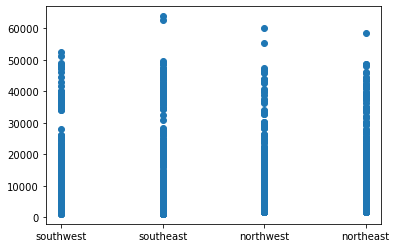

In [21]:
# Lets check if there is any impact of region on Insurance charges

fig,ax = plt.subplots()
ax.scatter(x=ins_cost['region'],y=ins_cost['charges']);


In [ ]:
# Region is not impacting the Insurance Charges

In [30]:
corr_matrix = ins_cost.corr()
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


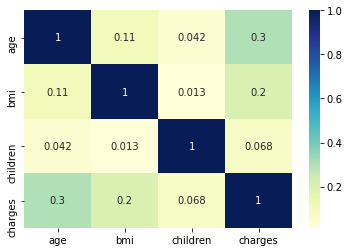

In [38]:
# Making a corrplot for correlation matrix
import seaborn as sns

fig,ax = plt.subplots()
ax = sns.heatmap(corr_matrix,
                annot=True,
                cmap='YlGnBu')


#### Prework for model creaation

In [23]:
# Prepare features and labels
# drop charges and region

X = ins_cost.drop(['charges','region'],axis=1)
y = ins_cost['charges']


In [24]:
# Prepare our data - replace catogrical values by numbers
# Using One Hot encoding or dummy variable

X_transformed = pd.get_dummies(ins_cost[['sex','smoker']])
X_transformed.head()

,sex_female,sex_male,smoker_no,smoker_yes
0,1,0,0,1
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0


In [26]:
# Standard sklearn imports

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [27]:
# Split the data into test and train

X_transformed_train,X_transformed_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2)

In [28]:
# Instantiate the model

Regr = RandomForestRegressor()

# Fit the model

Regr.fit(X_transformed_train,y_train)
Regr

RandomForestRegressor()

In [29]:
y_preds = Regr.predict(X_transformed_test)

In [71]:
# Evaluate the Model

print(f"R2 Score: {r2_score(y_test,y_preds)*100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

R2 Score: 70.69%
MAE: 5184.262666486814
MSE: 45600566.10504831
